In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

datosOriginales = pd.read_csv('dataset/datos_properati.csv', usecols=["price_aprox_usd","rooms", "price_usd_per_m2", "barrio"])
df = pd.DataFrame(datosOriginales)

In [2]:
df = df.dropna(subset=['price_aprox_usd', 'rooms', 'price_usd_per_m2', 'barrio'])
df.reset_index(drop=True, inplace=True)

Formula minimizar el error cuadratico medio ( Estimacion minimos cuadrados ordinario)

$\\beta = (X^{T}X)^{-1}X^{T}Y$

In [3]:
def grafica(barrio, filtroNumeroHabitaciones, numeroHabitaciones):
     
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10.0
    fig_size[1] = 8.0
    
    dfFiltro = df[df.barrio == barrio]
    dfFiltro = dfFiltro.drop(dfFiltro[dfFiltro.rooms > filtroNumeroHabitaciones].index)
    
    habitaciones = dfFiltro['rooms'].values
    precios = dfFiltro['price_aprox_usd'].values
    
    n = len(habitaciones)
    sumx2 = sum(habitaciones*habitaciones)
    sumy2 = sum(precios*precios)
    sumxy = sum(habitaciones*precios)
    promx = sum(habitaciones)/n
    promy = sum(precios)/n
    sigmax = np.sqrt(sumx2/n-promx**2)
    sigmay = np.sqrt(sumy2/n-promy**2) 
    sigmaxy = sumxy/n-promx*promy
    R2 = (sigmaxy/(sigmax*sigmay))**2

    x = np.array(habitaciones)
    y = np.array(precios)
    plt.scatter(x, y, color='C0')
    x = np.array([np.ones(len(dfFiltro)),x]).T
    B = np.linalg.inv(x.T @ x) @ x.T @ y
    
    ### B[0] es el termino independiente
    
    font = {'family': 'serif',
            'color':  '#e12f20',
            'weight': 'normal',
            'size': 16,
            }

    plt.plot([1, numeroHabitaciones], [B[0] + B[1] * 1, B[0] + B[1] * numeroHabitaciones], c="red")

    plt.title('Calculo para ' + str(numeroHabitaciones) + ' habitaciones en el barrio de ' + str(barrio), fontdict=font)
    plt.xlabel('Información en base al N° de habitaciones seleccionadas en el filtro: ' + str(filtroNumeroHabitaciones), fontdict=font)
    plt.ylabel('Precio Aprox en $', fontdict=font)
    plt.grid(True)
    plt.legend(('Estimación de Precios', 'Precio'),
           loc='lower right')
    plt.savefig('graficaRegresion', bbox_inches='tight')
    plt.suptitle('Coeficiente de Determinacion R2: ' + str(R2), fontsize=12)
    
    

In [4]:
### Listado de barrios
df.barrio.unique()

array(['PALERMO', 'BARRACAS', 'VILLA GRAL. MITRE', 'RECOLETA',
       'BALVANERA', 'MONSERRAT', 'VILLA CRESPO', 'LINIERS', 'SAN NICOLAS',
       'AGRONOMIA', 'VELEZ SARSFIELD', 'NUEZ', 'MATADEROS', 'RETIRO',
       'SAN CRISTOBAL', 'BELGRANO', 'VERSALLES', 'PARQUE CHACABUCO',
       'CABALLITO', 'FLORES', 'PUERTO MADERO', 'VILLA URQUIZA',
       'VILLA DEVOTO', 'CONSTITUCION', 'ALMAGRO', 'PARQUE PATRICIOS',
       'COLEGIALES', 'VILLA SANTA RITA', 'FLORESTA', 'SAAVEDRA',
       'VILLA RIACHUELO', 'BOEDO', 'CHACARITA', 'BOCA', 'MONTE CASTRO',
       'VILLA LURO', 'PARQUE AVELLANEDA', 'VILLA LUGANO', 'PATERNAL',
       'SAN TELMO', 'VILLA REAL', 'VILLA ORTUZAR', 'PARQUE CHAS',
       'NUEVA POMPEYA', 'VILLA DEL PARQUE', 'COGHLAN', 'VILLA PUEYRREDON',
       'VILLA SOLDATI'], dtype=object)

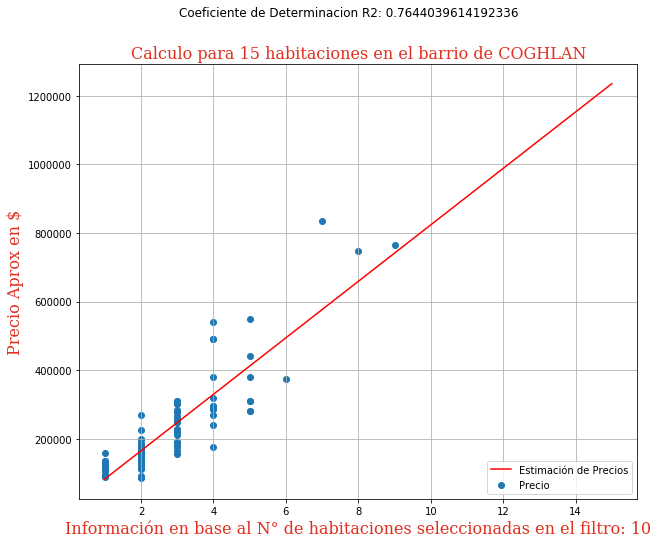

In [5]:
grafica('COGHLAN',10, 15)

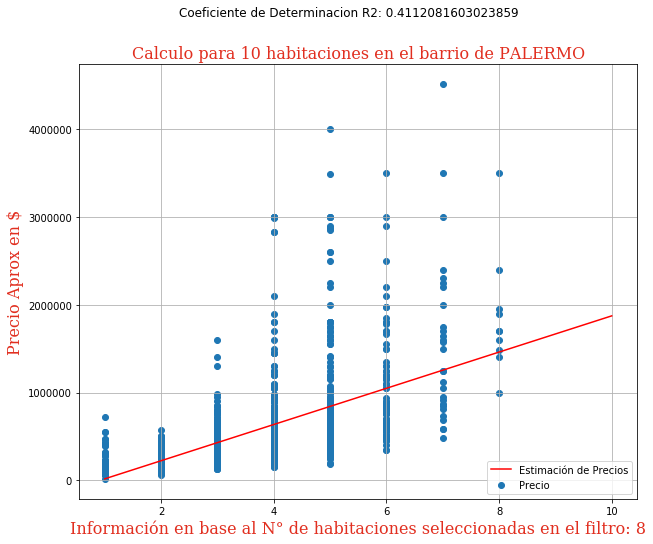

In [6]:
grafica('PALERMO',8, 10)

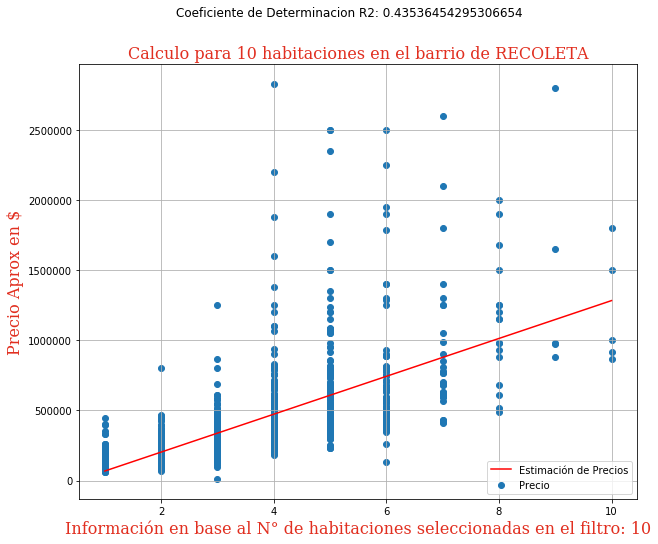

In [7]:
grafica('RECOLETA',10, 10)